# Практическая работа №3:  Статистический анализ диад

Выполнила студентка гр. 3385 Тараканова Александра Денисовна. Вариант №12.

## Цель работы

 Овладеть навыками работы с математическими пакетами для статисти
ческого анализа социальных сетей

### Основные определения


### Случайная сеть Эрдёша–Реньи (Erdős–Rényi model)

**Модель случайного графа Эрдёша–Реньи** $G(n, p)$, описывает сеть из n вершин, в которой каждая возможная дуга (для орграфа) или ребро (для неорграфа) появляется независимо от других с фиксированной вероятностью $ p \in [0,1]$ . Для ориентированного графа без петель общее число возможных дуг: $ n(n-1)$ .


### Диады и цензус диад

**Диада** — упорядоченная или неупорядоченная пара вершин. В ориентированном графе с матрицей смежности $X$ возможны три типа диад:

- **Симметричная M (mutual)**: дуги $  i \to j $ и $ j \to i $ присутствуют одновременно.

$$ M = 1/2 * tr(X^2)$$

- **Ассиметричная A (asymmetric)**: присутствует ровно одна из двух возможных дуг.

$$ A = tr(XX^T) + 2M$$

- **Нулевая N (null)**: обе дуги отсутствуют.

$$ N = C^2_g - A - M $$

**Цензус диад** — тройка чисел $ (M, A, N) $, сумма которых равна общему числу упорядоченных пар $ n(n-1)$ . Он характеризует глобальный баланс симметрии и плотности сети.

### Индекс взаимности Каца–Пауэлла

Измеряет избыток (или дефицит) взаимных связей по сравнению с ожиданием в случайной модели:
$$
\mu_{\text{кр}} = \frac{2(g - 1)M - gd^2}{gd(g - d -1)},
$$

где $ M $ — наблюдаемое число взаимных дуг, $d < g - 1$ - число выборов, который может сделать каждый актор

- **Фиксированная модель**: предполагается, что каждый узел имеет одинаковую ожидаемую степень $ d $.
- **Свободная модель**: учитывает реальное распределение входящих и исходящих степеней.

Значение $ \mu_{\text{кр}} \approx 0 $ означает случайный уровень взаимности, $ \mu_{\text{кр}} > 0 $ — избыток, $ \mu_{\text{кр}} < 0 $ — дефицит.

### Вероятность взаимной связи

В рамках модели Каца–Пауэлла оценивается вероятность того, что дуга $ i \to j $ сопровождается дугой $ j \to i $. Вычисляется отдельно для:
- **Фиксированного выбора** (все узлы одинаково активны),
- **Свободного выбора** (активность узлов задаётся их реальными степенями).

Различие между этими оценками показывает, насколько структура степеней влияет на взаимность.

### Индекс взаимности Бондопаддхая

Нормированный показатель, основанный на границах возможного числа взаимных дуг при фиксированном векторе степеней:
$$
M_{\text{B}} = \frac{M - M_{\min}}{M_{\max} - M_{\min}},
$$
где:
- $ M $ — наблюдаемое число взаимных дуг,
- $ M_{\min} ,  M_{\max} $ — минимально и максимально возможное число взаимных дуг при данном распределении степеней.

Значение $ M_{\text{B}} \in [0,1] $:
- $ M_{\text{B}} \approx 0 $: взаимность минимальна,
- $ M_{\text{B}} \approx 1 $: взаимность максимально возможна,
- $ M_{\text{B}} \approx 0.5 $: «средний» уровень.

## Постановка задачи

  С помощью математических пакетов и соответствующих библиотек про
вести статистический анализ случайно смоделированного ориентирован
ного графа. Полученные результаты содержательно проинтерпретиро
вать

## Выполнение работы

установка необходимой библиотеки.

In [2]:
# Подключаем библиотеку для работы с графами
if (!require(igraph)) {
  install.packages("igraph")
  library(igraph)
}


Loading required package: igraph

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘igraph’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




С помощью библиотеки igraph смоделировать случайный орграф
 𝒢d на основе модели Эрдеша—Реньи : 𝒢d = G(gp), где g– количество акторов(113), p– вероятность появления дуги между акторами(0,69).

In [3]:
Gd <- sample_gnp(n = 113, p = 0.69, directed = TRUE)

Отобразить полученный орграф.

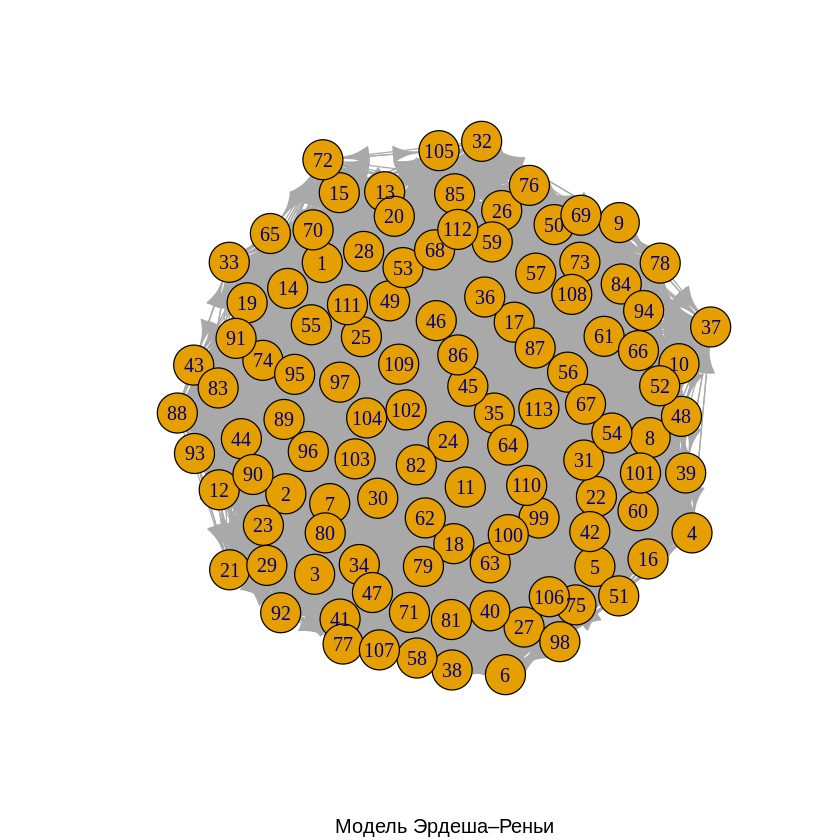

In [4]:
# Настройки для визуализации
plot(Gd, layout = layout_with_fr, sub = "Модель Эрдеша–Реньи")


Вычислить «пятичисловую сводку» для графа 𝒢d.

In [5]:
if (!require(intergraph)) {
  install.packages("intergraph")
  library(intergraph)
}

if (!require(statnet)) {
  install.packages("statnet")
  library(statnet)
}

Loading required package: intergraph

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘intergraph’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘statnet.common’, ‘network’


Loading required package: statnet

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘statnet’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘rbibutils’, ‘robustbase’, ‘ergm.multi’, ‘Rdpack’, ‘trust’, ‘lpSolveAPI’, ‘rle’, ‘networkLite’, ‘tergm’, ‘ergm.count’, ‘sna’, ‘tsna’, ‘ergm’, ‘networkDynamic’


Loading required package: tergm

Loading required package: ergm

Loading required package: network


‘network’ 1.19.0 (2024-12-08), part of the Statnet Project
* ‘news(package="network")’ for chang

In [6]:
sGd <- asNetwork(Gd)
# (a) Вычислить размер сети
cat("Размер сети:", network.size(sGd), "\n\n")

# (b) Вычислить плотность сети
cat("Плотность сети:", round(gden(sGd), 3), "\n\n")

# (c) Число компонент сети
components <- components(sGd)
cat(" Число компонент:", components, "\n\n")

# (d) Диаметр сети в statnet
lgc <- component.largest(sGd, result = "graph")
god <- geodist(lgc)
net_diameter <- max(god$gdist)
cat("Диаметр сети:", net_diameter, "\n\n")

# (e) Коэффициент кластеризации
clustering_coef <- gtrans(sGd, mode = "graph")
cat("Коэффициент кластеризации:", round(clustering_coef, 3), "\n")

Размер сети: 113 

Плотность сети: 0.688 

 Число компонент: 1 

Диаметр сети: 2 

Коэффициент кластеризации: 0.688 


плотность сети близка к вероятности возникновения ребра, что логично.

Вычислить цензус диад. Сделать выводы.

In [7]:
dyads <- dyad_census(Gd)
dyads


$mut
[1] 2992

$asym
[1] 2717

$null
[1] 619

наибольшее количество взаимных диад, что хорошо соотносится с большой вероятностью возникновения ребра, с этим же связано и малое количество нулевых диад.

Вычислить оценку индекса взаимности Каца—Пауэла при фикси
рованом выборе акторов d и при свободном выборе. Сделать выво
ды.

In [8]:
#подбор d
d <- 79
g<-network.size(sGd)
M <- dyads$mut
R_kp_fixed <- (2*(g-1)*M-g*d*d )/(g*d*(g-1-d))
cat("Индекс Каца–Пауэла (фиксированный выбор):", round(R_kp_fixed, 4), "\n")

out_degrees <- degree(sGd, cmode = "outdegree")
L <- sum(out_degrees)
L2 <- sum(out_degrees^2)     # Сумма квадратов исходящих степеней
R_kp_free <- (2*(g-1)*(g-1)*M-L*L + L2 )/(L*(g-1)*(g-1)-L*L + L2)
cat("Индекс Каца–Пауэла (свободный выбор):", round(R_kp_free, 4), "\n")

Индекс Каца–Пауэла (фиксированный выбор): -0.1189 
Индекс Каца–Пауэла (свободный выбор): 8e-04 


путем смены d стало понятно, что коэффициент сильно меняется от него. максимально близки индексы становятся при приблизительно d=n*p.

Вычислить вероятность того, что связь будет взаимной для каж
дого случая.

In [9]:
p_fixed <- d/(g-1)*(d/(g-1) + R_kp_fixed*(g-1-d)/(g-1))
cat("Вероятность взаимной связи (фиксированный выбор):", round(p_fixed, 4), "\n")
Pij_free <- (L / (g * (g - 1))) * ((L / (g * (g - 1)))  + R_kp_free * (1 - (L / (g * (g - 1)))))
cat("Вероятность взаимной связи при free выборе: ", Pij_free)

Вероятность взаимной связи (фиксированный выбор): 0.4728 
Вероятность взаимной связи при free выборе:  0.4728365

Вычислить индекс взаимности Бондопаддхая. Сделать выводы.

In [10]:
max_g <- -Inf
M_min <- -Inf

for (t in 1:g) {
    f_t <- sum(out_degrees[1:t]) - t * (g - 1) - (t * (t - 1)) / 2

    if (t == g) {
        sum_min_rest <- 0
    } else {
        sum_min_rest <- sum(pmin(t, out_degrees[(t + 1):g]))
    }

    g_t <- sum(out_degrees[1:t]) - t * (t - 1) - sum_min_rest

    if (g_t > max_g) max_g <- g_t
    if (f_t > M_min) M_min <- f_t
}

M_min <- pmax(0, M_min)
M_max <- (sum(out_degrees) - max_g) / 2

cat("M_max: ", M_max, "\n")
cat("M_min: ", M_min, "\n")

M_b <- (dyads$mut - M_min) / (M_max - M_min)
cat("Индекс взаимности Бондопаддхая: ", M_b, "\n")

M_max:  4364.5 
M_min:  0 
Индекс взаимности Бондопаддхая:  0.685531 


индекс взаимности близок к 70 процентам, что является достаточно высоким показателем. это говорит о тендеции акторов к взаимному выбору.

Проверить нулевую гипотезу о том, что число дуг L в орграфе
𝒢d имеет биномиальное распределение Binom(g(g − 1)/2,1/2) при
уровне значимости α. Определить максимальный уровень значи
мости при котором нулевая гипотеза не отвергается.

In [11]:
L <- ecount(Gd)
alpha <- 0.01

p0_1 <- 0.5
prob_obs_1 <- dbinom(L, size = g * (g - 1), prob = p0_1)# вероятность получения l дуг при заднной вероятности
probs_1 <- dbinom(0:(g * (g - 1)), size = g * (g - 1), prob = p0_1)#вектор вероятностей для всех значений L
pval_1 <- sum(probs_1[probs_1 <= prob_obs_1])#вероятность получить наблюдаемые или еще более экстремальные результаты исследования, если верна нулевая гипотеза

cat("p-value =", pval_1, "\n")
cat("H0", ifelse(pval_1 < alpha, "отвергается", "не отвергается"), "на уровне α =", alpha, "\n\n")

p-value = 0 
H0 отвергается на уровне α = 0.01 



Максимальный уровень значимости, при котором нулевая гипотеза не отвергается, равен p-value.
Если фактический уровень значимости α будет меньше этого значения, то у нас недостаточно оснований отвергать H₀.
Если α будет больше или равен p-value — H₀ отвергается.

p-value имеет такое значение поскольку фактическое и теоретическое количество дуг отличается около 1000.

Проверить нулевую гипотезу о том, что число дуг L в орграфе
𝒢d имеет биномиальное распределение Binom(g(g − 1)/2,P0) при
уровне значимости α. Определить максимальный уровень значи
мости при котором нулевая гипотеза не отвергается

In [12]:
L <- ecount(Gd)
alpha <- 0.01

p0_1 <- 0.62
prob_obs_1 <- dbinom(L, size = g * (g - 1), prob = p0_1)# вероятность получения l дуг при заднной вероятности
probs_1 <- dbinom(0:(g * (g - 1)), size = g * (g - 1), prob = p0_1)#вектор вероятностей для всех значений L
pval_1 <- sum(probs_1[probs_1 <= prob_obs_1])#вероятность получить наблюдаемые или еще более экстремальные результаты исследования, если верна нулевая гипотеза

cat("p-value =", pval_1, "\n")
cat("H0", ifelse(pval_1 < alpha, "отвергается", "не отвергается"), "на уровне α =", alpha, "\n\n")

p-value = 1.412952e-56 
H0 отвергается на уровне α = 0.01 



p-value уже чуть больше, но все еще очень мало.

Построить доверительный интервал для оценки параметра p с до
верительной надёжностью 1 −α. Сделать выводы.

In [18]:
p_hat <- L / (g * (g - 1))
se <- sqrt(p_hat * (1 - p_hat) / (g * (g - 1)))
z <- qnorm(1 - alpha/2)

ci_low <- p_hat - z * se
ci_up  <- p_hat + z * se

cat("Оценка p =", round(p_hat, 4), "\n")
cat((1 - alpha) * 100, "% ДИ для p: [", round(ci_low, 4), ",", round(ci_up, 4), "]\n")
cat("Значение p = 0.69", ifelse(0.69 >= ci_low & 0.69 <= ci_up, "", "НЕ"), "попадает в ДИ\n")

Оценка p = 0.6875 
99 % ДИ для p: [ 0.6769 , 0.6981 ]
Значение p = 0.69  попадает в ДИ


Истинное значение параметра  p=0.69, заданное при генерации графа, попадает в этот интервал. Это подтверждает, что:
Моделирование выполнено корректно;
Оценка  является состоятельной и несмещённой;
Таким образом, с высокой степенью уверенности (99%) можно утверждать, что вероятность связи в сети лежит в указанном диапазоне, который включает истинное значение.

## Выводы

в ходе работы был смоделирован граф с случайными ребрами на основе модели Эрдеша- Реньи. Визуальная оценка графа крайне затруднительна так как количество вершин и вероятность возникновения ребра достаточно велики. поэтому были применены другие методы анализа, такие как пятичисловая сводка.

было расчитано количество взаимных и односторонних диад. и расчитаны индексы взаимности.

Каца-Пауэла показал насколько чаще взаимные диады встречались чаще, чем ожидалось.

а индекс взаимности Бондопаддхая позволил оценить отношение взаимных диад ко всем возможным.

была проверена гипотеза о принадлежности к биномиальному распределению с разной вероятностью успеха и построен доверительный интервал для вероятности возникновения ребра.